In [49]:
import nibabel as nib
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import lsq_linear,nnls,curve_fit
from scipy import stats
import multiprocessing
import os, sys
import matplotlib.pyplot as plt

plotting = True

DIR="/NAS/dumbo/protocoles/CAR-T-Cell/process/DERYCKE_CORINNEE_fsl_mc/"#sys.argv[1]
DynScanTimeInS=23.2 #float(sys.argv[2])
aif=np.loadtxt(DIR+"aif_washOut.txt")
img=nib.load(DIR+"C_t_wonan_washOut.nii.gz")
ktrans=nib.load(DIR+"Ktrans_slope.nii.gz")
vp=nib.load(DIR+"Vp_intercept.nii.gz")
maskROIpath="/NAS/dumbo/protocoles/CAR-T-Cell/process/DERYCKE_CORINNEE_fsl_mc/ROI2_WM.nii.gz"
maskROIname=os.path.basename(maskROIpath).rsplit('.',2)[0]
maskROI=nib.load(maskROIpath)

ktrans_data=ktrans.get_data()
vp_data=vp.get_data()
img_data=img.get_data()
maskROI_data=maskROI.get_data()

Hct=0.45
C_p=aif[:] / (1 - Hct) 
X=np.cumsum(C_p)*DynScanTimeInS/C_p
Xs=X.reshape(len(C_p),1)

ind=np.nonzero(maskROI_data.flatten())
ROI_ktrans=ktrans_data.flatten()[ind]
ROI_vp=vp_data.flatten()[ind]

x1=np.linspace(0, C_p.size-1, C_p.size, endpoint=True)*DynScanTimeInS
ind=np.nonzero(maskROI_data)
ROI_Ct=img_data[ind[0],ind[1],ind[2],:]

if plotting :
    plt.figure(1)
    plt.clf()
    plt.plot(x1,np.transpose(ROI_Ct),"k.")
    plt.ylabel("Concentration (mmol/mL)")
    plt.xlabel("time [sec]")
    plt.savefig(DIR+maskROIname+'_concentration.png')
    #plt.show()

#popt,pcov = curve_fit(linreg,Xs.flatten(),np.transpose(GM_Ct), bounds=(0,1))
#z1 = np.polyfit(Xs.flatten(),np.transpose(GM_Ct),1)
#a, b, r, p, std_err = stats.linregress(Xs.flatten(),np.transpose(GM_Ct))

ind=np.nonzero(maskROI_data)
ROI_Ct=(img_data/C_p)[ind[0],ind[1],ind[2],:]
Ys=np.mean(ROI_ktrans)*Xs+np.mean(ROI_vp)
legend="Ktrans="+str(round(np.mean(ROI_ktrans)*100,4))+" Vp="+str(round(np.mean(ROI_vp)*100,4))

if plotting :
    plt.figure(1)
    plt.clf()
    plt.plot(Xs,np.transpose(ROI_Ct),"k.")
    plt.plot(Xs,Ys,'-k',label=legend)
    plt.ylabel(" C(t)/Cp(t) [ml/g]")
    plt.xlabel("streched time [sec]")
    plt.title('Patlak Plot')
    plt.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.savefig(DIR+maskROIname+'_patlak.png')
    #plt.show()

if plotting :
    plt.figure(1)
    plt.clf()
    plt.boxplot([ROI_vp],showfliers=True)
    plt.ylabel("Vp []")
    plt.savefig(DIR+maskROIname+'_boxplot_vp.png')
    #plt.show()

if plotting :
    plt.figure(1)
    plt.clf()
    plt.boxplot([ROI_ktrans],showfliers=True)
    plt.ylabel("Ktrans []")
    plt.savefig(DIR+maskROIname+'_boxplot_ktrans.png')
    #plt.show()

In [47]:
C_p.size+1

25

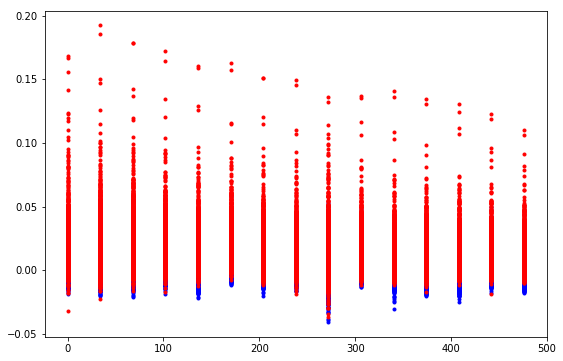

In [66]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
x1=np.linspace(0, 14, 15, endpoint=True)*DynScanTimeInS

ind=np.nonzero(maskWM_data)
WM_Ct=img_fsl_data[ind[0],ind[1],ind[2],:]
ax.plot(x1,np.transpose(WM_Ct),"b.")

ind=np.nonzero(maskGM_data)
GM_Ct=img_fsl_data[ind[0],ind[1],ind[2],:]
ax.plot(x1,np.transpose(GM_Ct),"r.")

ax.set_ylim(-0.05,0.20)
plt.show()

/home/global/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


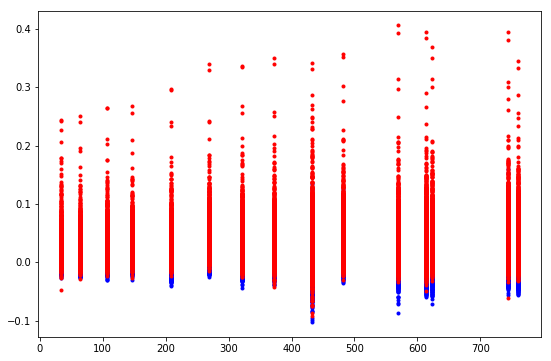

In [85]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ind=np.nonzero(maskWM_data)
WM_Ct=(img_fsl_data/C_p)[ind[0],ind[1],ind[2],:]
ax.plot(Xs,np.transpose(WM_Ct),"b.")

ind=np.nonzero(maskGM_data)
GM_Ct=(img_fsl_data/C_p)[ind[0],ind[1],ind[2],:]
ax.plot(Xs,np.transpose(GM_Ct),"r.")

plt.show()

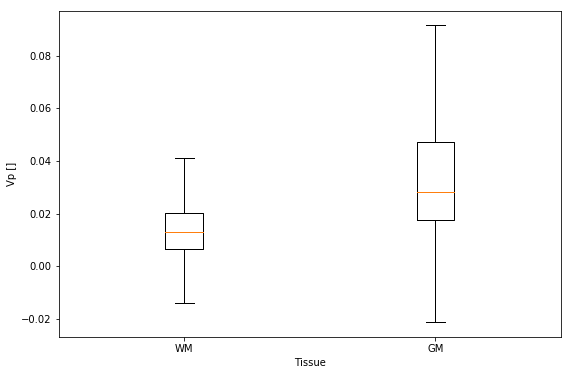

In [44]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot([WM_vp,GM_vp],showfliers=False)
ax.set_ylabel("Vp []")
ax.set_xticklabels(['WM','GM'])
ax.set_xlabel("Tissue")
plt.show()

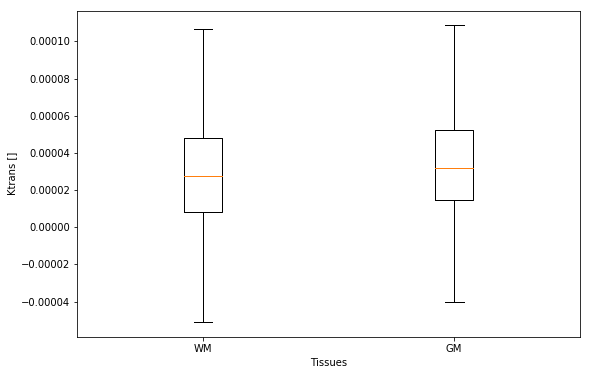

In [43]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot([WM_ktrans,GM_ktrans],showfliers=False)
ax.set_ylabel("Ktrans []")
ax.set_xticklabels(['WM','GM'])
ax.set_xlabel("Tissues")
plt.show()